In [1]:
import anndata
import numpy as np
import os
import scanpy as sc

In [3]:
odata = anndata.read_h5ad('covid_portal_210320_with_raw.h5ad')

In [4]:
odata

AnnData object with n_obs × n_vars = 647366 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

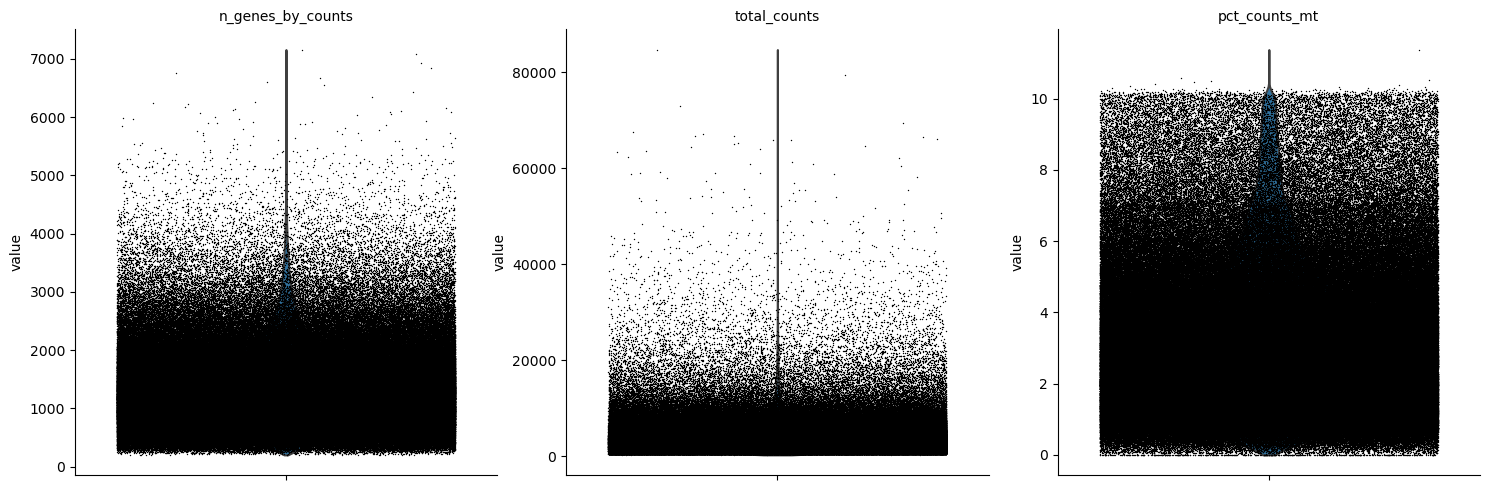

In [6]:
sc.pl.violin(odata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

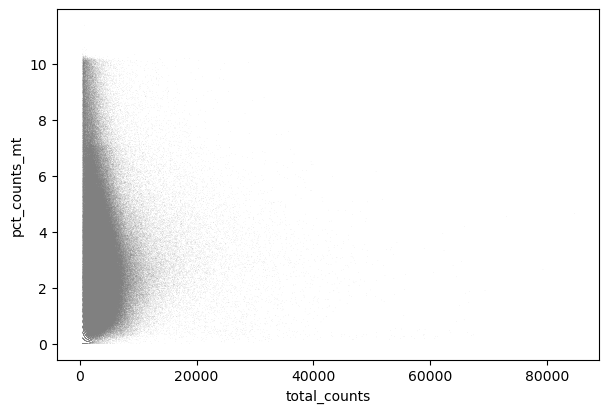

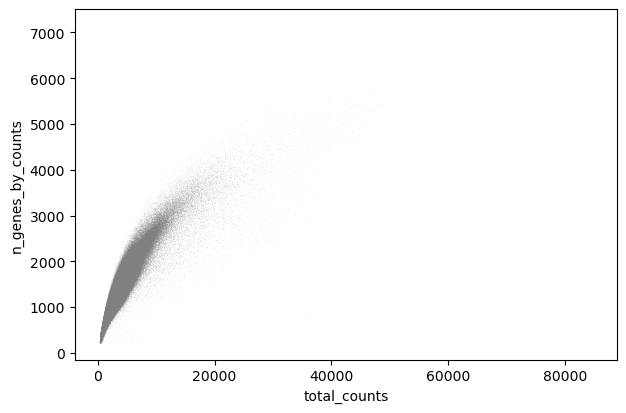

In [7]:
sc.pl.scatter(odata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(odata, x='total_counts', y='n_genes_by_counts')

In [5]:
### drop unnecessary keys

odata.layers.pop('raw')




<647366x24929 sparse matrix of type '<class 'numpy.float32'>'
	with 965744336 stored elements in Compressed Sparse Row format>

In [6]:
### only get gene expression
odata = odata[:,(np.array(odata.var['feature_types']) == 'Gene Expression')]

In [7]:
x = (odata.X)

In [8]:
x = np.array(x.todense())

In [9]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
x.sum(axis=1)

array([2313.0264, 2306.5403, 2715.1082, ..., 2081.9702, 1993.1694,
       2747.5132], dtype=float32)

In [11]:
x = np.exp(x) - 1

In [12]:
x.sum(axis=1)

array([10000.   , 10000.   , 10000.001, ..., 10000.   , 10000.   ,
        9999.999], dtype=float32)

In [13]:
from scipy.sparse import csr_matrix, vstack, hstack
from scipy import sparse
adata = anndata.AnnData( sparse.csr_matrix(x))
adata.obs = odata.obs
var = odata.var
if len(var) > x.shape[1]:
    var = var[odata.var['feature_types'] == 'Gene Expression']
adata.var = var
adata.obsm = odata.obsm
adata.uns = odata.uns


In [14]:
adata.write('covid_gene_cnt.h5ad') ## sparse

In [2]:
adata = anndata.read_h5ad('covid_gene_cnt.h5ad')

In [27]:
print(np.unique(odata.obs['sample_id']))
#print(np.unique(odata.obs['patient_id']).shape)

['AP1' 'AP10' 'AP11' 'AP12' 'AP2' 'AP3' 'AP4' 'AP5' 'AP6' 'AP8' 'AP9'
 'BGCV01_CV0025' 'BGCV01_CV0144' 'BGCV01_CV0902' 'BGCV01_CV0904'
 'BGCV02_CV0052' 'BGCV02_CV0059' 'BGCV02_CV0068' 'BGCV02_CV0902'
 'BGCV03_CV0074' 'BGCV03_CV0084' 'BGCV03_CV0176' 'BGCV03_CV0200'
 'BGCV04_CV0100' 'BGCV04_CV0164' 'BGCV04_CV0262' 'BGCV04_CV0911'
 'BGCV05_CV0120' 'BGCV05_CV0128' 'BGCV05_CV0284' 'BGCV05_CV0929'
 'BGCV06_CV0037' 'BGCV06_CV0178' 'BGCV06_CV0201' 'BGCV06_CV0234'
 'BGCV07_CV0094' 'BGCV07_CV0104' 'BGCV07_CV0134' 'BGCV07_CV0137'
 'BGCV08_CV0073' 'BGCV08_CV0155' 'BGCV08_CV0201' 'BGCV08_CV0915'
 'BGCV09_CV0062' 'BGCV09_CV0171' 'BGCV09_CV0279' 'BGCV09_CV0917'
 'BGCV10_CV0160' 'BGCV10_CV0198' 'BGCV10_CV0231' 'BGCV10_CV0939'
 'BGCV11_CV0050' 'BGCV11_CV0058' 'BGCV11_CV0180' 'BGCV11_CV0257'
 'BGCV12_CV0062' 'BGCV12_CV0068' 'BGCV12_CV0178' 'BGCV12_CV0926'
 'BGCV13_CV0073' 'BGCV13_CV0171' 'BGCV13_CV0326' 'BGCV13_CV0934'
 'BGCV14_CV0050' 'BGCV14_CV0137' 'BGCV14_CV0284' 'BGCV14_CV0940'
 'BGCV15_CV0176' 'BG

In [29]:
print(np.unique(odata.obs['patient_id']))

['AP1' 'AP10' 'AP11' 'AP12' 'AP2' 'AP3' 'AP4' 'AP5' 'AP6' 'AP8' 'AP9'
 'CV0025' 'CV0037' 'CV0050' 'CV0052' 'CV0058' 'CV0059' 'CV0062' 'CV0068'
 'CV0073' 'CV0074' 'CV0084' 'CV0094' 'CV0100' 'CV0104' 'CV0120' 'CV0128'
 'CV0134' 'CV0137' 'CV0144' 'CV0155' 'CV0160' 'CV0164' 'CV0171' 'CV0176'
 'CV0178' 'CV0180' 'CV0198' 'CV0200' 'CV0201' 'CV0231' 'CV0234' 'CV0257'
 'CV0262' 'CV0279' 'CV0284' 'CV0326' 'CV0902' 'CV0904' 'CV0911' 'CV0915'
 'CV0917' 'CV0926' 'CV0929' 'CV0934' 'CV0939' 'CV0940' 'CV0944'
 'MH8919176' 'MH8919177' 'MH8919178' 'MH8919179' 'MH8919226' 'MH8919227'
 'MH8919228' 'MH8919229' 'MH8919230' 'MH8919231' 'MH8919232' 'MH8919233'
 'MH8919276' 'MH8919277' 'MH8919278' 'MH8919279' 'MH8919280' 'MH8919281'
 'MH8919282' 'MH8919283' 'MH8919326' 'MH8919327' 'MH8919328' 'MH8919329'
 'MH8919330' 'MH8919331' 'MH8919332' 'MH8919333' 'MH9143270' 'MH9143271'
 'MH9143272' 'MH9143273' 'MH9143274' 'MH9143275' 'MH9143276' 'MH9143277'
 'MH9143320' 'MH9143321' 'MH9143322' 'MH9143323' 'MH9143324' 'M

In [26]:
### record patient ids
pids = np.unique(odata.obs['patient_id'])
f=open('pids.txt','w')
for pid in pids:
    f.write(pid + '\n')
f.close()
               

sids = np.unique(odata.obs['sample_id'])
f=open('sids.txt','w')
for sid in sids:
    f.write(sid + '\n')
f.close()          

In [15]:
### filter tiny values and re-normalize

x = x*(x>10)


In [16]:
x.sum(axis=1)

array([4792.818 , 5984.292 , 5485.899 , ..., 6068.76  , 6384.0537,
       4751.08  ], dtype=float32)

In [17]:
fdata = anndata.AnnData( sparse.csr_matrix(x))
fdata.obs = odata.obs
fdata.var = odata.var
fdata.obsm = odata.obsm
fdata.uns = odata.uns

In [18]:
sc.pp.normalize_total(fdata,1e4)

In [19]:
fdata.obsm.pop('X_pca')
fdata.obsm.pop('X_umap')
fdata.uns.pop('hvg')
fdata.uns.pop('leiden')
fdata.uns.pop('neighbors')
fdata.uns.pop('pca')
fdata.uns.pop('umap')

{'params': {'a': 0.583030019901822, 'b': 1.3341669931033755}}

In [20]:
fdata.write('covid_filtered_normed_cnt.h5ad')

In [34]:
import copy
logfdata = copy.deepcopy(fdata)

In [35]:
sc.pp.log1p(logfdata)

In [36]:
logfdata.var = logfdata.var[logfdata.var['feature_types'] == 'Gene Expression']

In [154]:
markers= ["CD4", "FOXP3", "CD19", "CD79A", "CD14", \
               "CD69",'IL7R','LYZ','MS4A1','CD8A','GNLY',\
               'NKG7','FCGR3A','MS4A7','FCER1A','CST3','PPBP',\
              'CD34','CD8A','CD8B','CD8B2','ACE2','CD56',\
              'CCL4','CCL4L2','IL7','IL1A','CD38','AXL','SIGLEC6',\
              'CD83','C1QA','C1QC','C1QB','MKI67','TOP2A',\
              'S100A8','CCL2','CCL7','CCL8','CD1C','CLEC9A',\
               'IL10','TNF','IL12A','IL12B','IL23R','IL23A',\
               'IL6','SIRPA','CD47','FPR1','ANXA1','FPR2',\
               'APP','CD11A','CD11B','CD11C','CD18','GATA1',\
               'MPO','PF4','IL22','LAG3','TOX','CD137','BTK',\
               'FCGR2B','PTPN6','CD72','CD3','CCR7','CD45RA',\
               'CD45RO','CD62L','CD27','CD44','CXCR5','CD40LG',\
               'CCR7','FOXP3','IKZF2','TRGV9','TRGV2','NCAM1',\
               'NCR1','FCGR3A','IFNG','TBX21','TNFA','GATA3',\
               'IL5','RORC','IL17A','IL17F','IL21','CDR3'\
              ]

In [96]:
#for g in logfdata.var.index:
#    if 'BTK' in g:
#        print(g)

In [97]:
for g in pbmc_markers:
    if g not in logfdata.var.index:
        print(g)

CD56
CD11A
CD11B
CD11C
CD18
CD137
CD3
CD45RA
CD45RO
CD62L
TNFA
CDR3


In [98]:
sc.pp.highly_variable_genes(logfdata, n_top_genes = 6000)#min_mean=0.0125, max_mean=3, min_disp=0.5)

In [99]:
(logfdata.var['highly_variable']).sum()

6000

In [100]:
logfdata = logfdata[:, logfdata.var.highly_variable]

In [101]:
hvg = logfdata.var.index[logfdata.var.highly_variable]

In [102]:
logfdata

View of AnnData object with n_obs × n_vars = 647366 × 6000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca_harmony'

In [103]:
sc.tl.pca(logfdata, svd_solver='arpack')

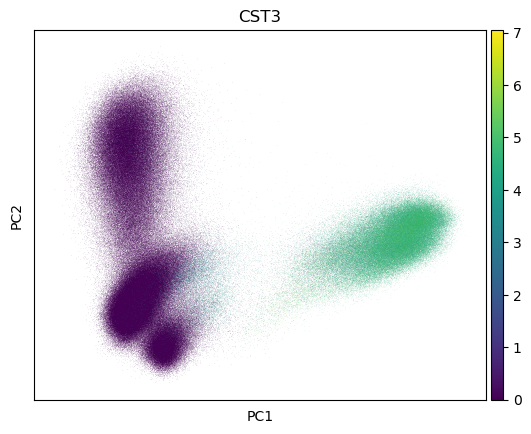

In [104]:
sc.pl.pca(logfdata, color='CST3')

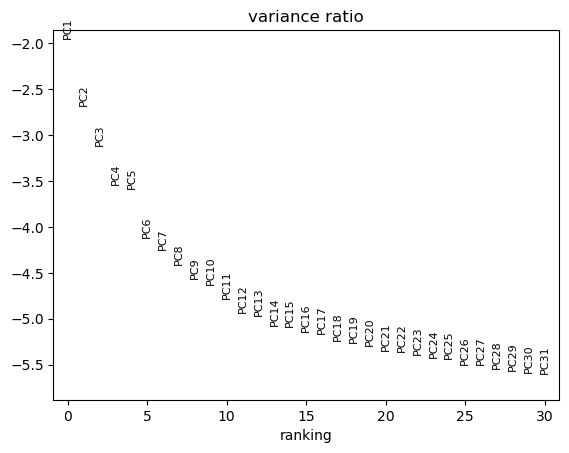

In [105]:
sc.pl.pca_variance_ratio(logfdata, log=True)

In [106]:
sc.pp.neighbors(logfdata, n_neighbors=10, n_pcs=40)

In [107]:
#sc.tl.paga(logfdata)
#sc.pl.paga(logfdata, plot=True)  # remove `plot=False` if you want to see the coarse-grained graph
#sc.tl.umap(logfdata, init_pos='paga')

In [108]:
sc.tl.umap(logfdata)

In [110]:
#sc.pl.umap(logfdata, color=['CST3', 'NKG7', 'PPBP','CD79A'])

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


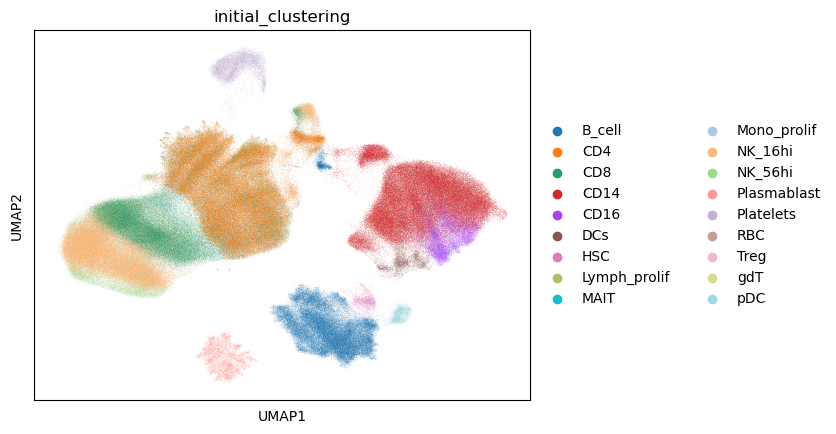

In [111]:
sc.pl.umap(logfdata, color='initial_clustering')

In [112]:
logfdata.write('logfdata.h5ad')

In [ ]:
### finished preprocessing quality checking
### start pseudo bulk analysis


In [139]:
bulks = []
sids = np.unique(odata.obs['sample_id'])
newsids = []
for i in range(len(sids)):
    sid = sids[i]
    adata = fdata[fdata.obs['sample_id'] == sid]
    if (adata.X.shape[0])>1000:
        newsids.append(sid)
        bulks.append(np.array(adata.X.todense()).mean(axis=0))
    

In [204]:
bx = np.array(bulks)
bulkdata = anndata.AnnData(bx)
bulkdata.var.index = fdata.var.index
bulkdata.obs['sample_id'] = newsids

In [205]:
f=open('sids.txt','w')
for sid in sids:
    f.write(sid+'\n')
f.close()

In [206]:
bulkdata.write('bulkcnt.h5ad')

In [207]:
## bulk hv
sc.pp.log1p(bulkdata)

In [208]:
sc.pp.highly_variable_genes(bulkdata, n_top_genes=6000)

In [209]:
np.array(bulkdata.var['highly_variable']).sum()

6000

In [210]:
for i in range(bulkdata.X.shape[1]):
    g = bulkdata.var.index[i]
    if g in markers:
        bulkdata.var['highly_variable'][i] = True
np.array(bulkdata.var['highly_variable']).sum()

/tmp/ipykernel_2736412/1626222892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulkdata.var['highly_variable'][i] = True


6030

In [211]:
bulkdata

AnnData object with n_obs × n_vars = 124 × 24737
    obs: 'sample_id'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [212]:
hvmask = bulkdata.var['highly_variable']

In [213]:
bulkdata = bulkdata[:,bulkdata.var['highly_variable']]

In [214]:
bulkdata.write('bulk_log_hv.h5ad')

In [215]:
bulkdata

View of AnnData object with n_obs × n_vars = 124 × 6030
    obs: 'sample_id'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [216]:
from sklearn.decomposition import PCA
reducer =  PCA(n_components = 100)#,svd_solver = 'randomized')#randomized_svd(n_components=100)  #PCA(n_components=100)#
bpca = reducer.fit_transform(bulkdata.X)

In [217]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0,max_iter=3000).fit(bpca) 
cluster_labels = kmeans.labels_

In [218]:
# select representatives
pnums = []
for i in range(len(bulkdata.X)):
    pnums.append(i)
pnums=np.array(pnums)


centers=[]
representatives=[]
repredic={}

for i in range(len(np.unique(cluster_labels))):
    mask = (cluster_labels==i)
    cluster = bpca[mask]
    cluster_patients = pnums[mask]
    center = cluster.mean(axis=0)
    centers.append(center)
            
    # find the closest patient
    sqdist = ((cluster - center)**2).sum(axis=1)

    cluster_representative = cluster_patients[np.argmin(sqdist)]
    representatives.append(cluster_representative)
    repredic[i] = cluster_representative
        
centers = np.array(centers)

In [219]:
init_cluster_labels = cluster_labels
init_representatives = representatives

In [220]:
import umap
dimred=umap.UMAP(min_dist=0.3,n_neighbors=15)
vis_bulk=dimred.fit_transform(bpca)

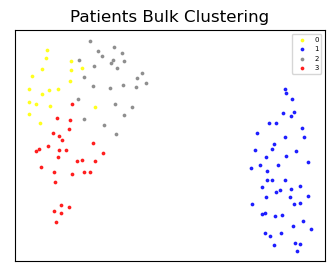

In [221]:
# sample plot
import matplotlib.pyplot as plt
BATCH_SIZE=4
fig, ax = plt.subplots(figsize=(4,3),dpi=100)
colormap = ['yellow','blue','gray','red','green','black','darkgreen','darkorange','crimson',\
            'purple','navy','aquamarine','plum','violet','olive','steelblue']

for i in range(BATCH_SIZE):
    group = vis_bulk[np.array(cluster_labels)==i] #uz34
    ax.scatter(group[:,0],group[:,1],c=colormap[i],alpha=0.8,s=3,label=i)


plt.title('Patients Bulk Clustering')
ax.legend(fontsize=5)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

In [222]:

f=open('init_cluster_labels_4.txt','w')
for i in range(len(init_cluster_labels)):
    f.write(str(init_cluster_labels[i])+'\n')
f.close()

f=open('init_representatives_4.txt','w')
for i in range(len(init_representatives)):
    f.write(str(init_representatives[i])+'\n')
f.close()

bulkdata.write('normed_reduced_bulk.h5ad') # bad sample filtered

In [226]:
hvmask = np.array(hvmask)
np.save('hvmask.npy',hvmask)

In [11]:
hvmask = np.load('hvmask.npy')

In [8]:
ld= anndata.read_h5ad('covid_filtered_normed_cnt.h5ad')

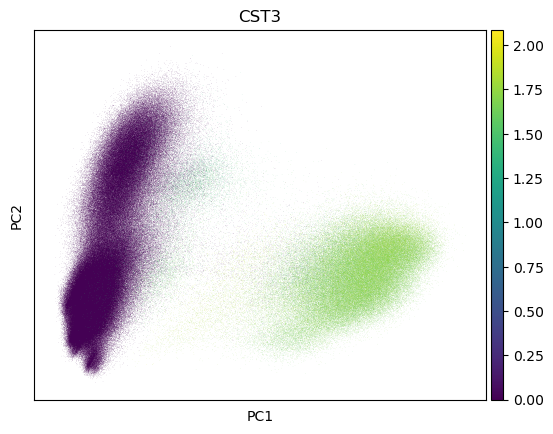

In [12]:
### check hv genes quality
sc.pp.log1p(ld)
ld.var = ld.var[ld.var['feature_types'] == 'Gene Expression']
ld = ld[:, hvmask]
sc.tl.pca(ld, svd_solver='arpack',n_comps=100)
sc.pl.pca(ld, color='CST3')


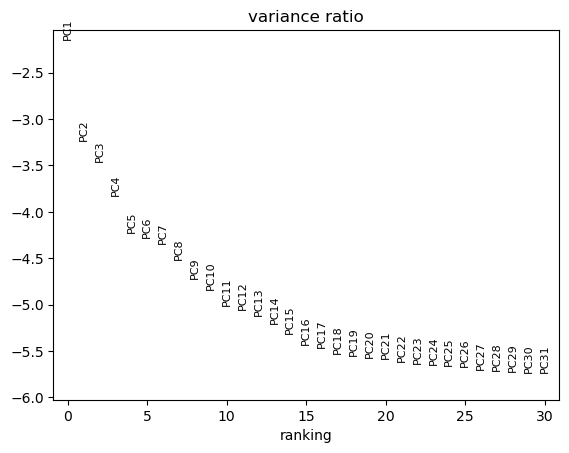

In [13]:
sc.pl.pca_variance_ratio(ld, log=True)

/mnt/data/jingtao2/anaconda3/envs/deep/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


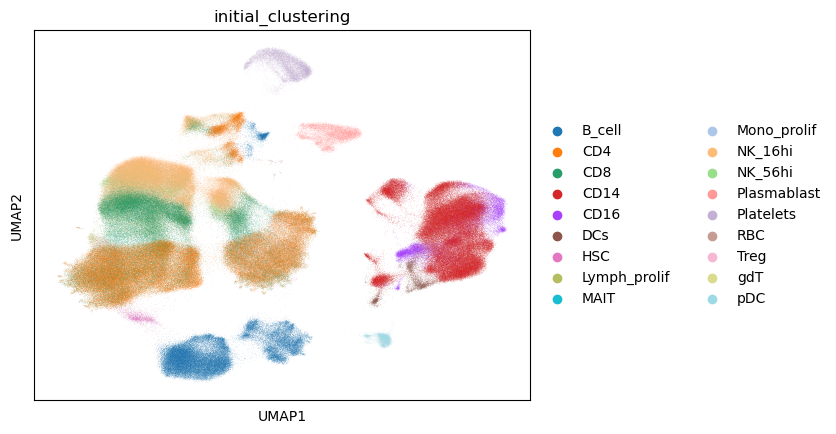

In [14]:
import timeit
start = timeit.default_timer()
sc.pp.neighbors(ld, n_neighbors=15, n_pcs=100)
sc.tl.umap(ld)
sc.pl.umap(ld, color='initial_clustering')
end = timeit.default_timer()
print(str(end-start))

In [246]:
adata = anndata.read_h5ad('../cancer/sample_sc/EXT001.h5ad')
adata.X.max()

7642.7935

In [2]:
ftdata = anndata.read_h5ad('covid_filtered_normed_cnt.h5ad')

In [248]:
for i in range(len(newsids)):
    sid = newsids[i]
    adata = ftdata[ftdata.obs['sample_id'] == sid,:]
    
    adata.write('sample_sc/' + sid + '.h5ad')

In [3]:
sids = np.unique(ftdata.obs['sample_id'])

In [5]:
newsids = []
for i in range(len(sids)):
    sid=sids[i]
    adata = ftdata[ftdata.obs['sample_id']==sid]
    if adata.X.shape[0]>1000:
        newsids.append(sid)

In [7]:
f = open('sids.txt','w')

for sid in newsids:
    f.write(sid + '\n')
f.close()